<div align="center">
    <b><h2>МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ</h2></b><br/>
    <h4>Національний університет “Львівська політехніка”</h4>
    <h4>Кафедра Систем Штучного Інтелекту</h4>
</div>
<br/>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Nulp_logo_ukr.jpg/948px-Nulp_logo_ukr.jpg" width="500" alt="nulp logo"  />
</center>
<br/><br/><br/><br/>
<div align="center">
    <h4>Лабораторна робота №2</h4>
    <h4>Варіант №18(3)</h4>
    <h4>Звіт з дисципліни "Машинне навчання"</h4>
    <h4>Тема: "Дерева рішень. Метод головних компонент."</h4>
</div>
<br/><br/><br/>
<br/><br/><br/><br/><br/>
<div align="right">
    <h4><b>Виконав:</b></h4>
    <h4>студент</h4>
    <h4>Орлянський Максим</h4>
    <h4><b>Група:</b></h4>
    <h4>КН-317</h4>
    <h4><b>Прийняв:</b></h4>
    <h4>асистент</h4>
    <h4>Яцишин В. П.</h4>
</div>
<div align="center">
<h5>Львів  2024</h5>
</div>
<br/><br/><br/>
<h5><b>Тема:</b>  Дерева рішень. Метод головних компонент.</h5>
<h5><b>Мета: </b> Засвоїти основні відомості про роботу з алгоритмом метод головних компонент(PCA) та дерева рішень.</h5>
<br/><br/>
<div align="center">
<h1>Завдання лабораторної роботи
</h1>
</div>

**Частина 1. Підготовка даних**
* Завантажити дані згідно варіанту.
* Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15
* Обробити NaN значення - або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обгрунтувати.
* Нормалізувати дані - для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля.
Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних

**Частина 2. Побудова дерева рішень**

* Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.
* Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

**Частина 3. Зашумлення.**

* Добавити до тренувальних даних шум. Зробити це додаючи випадкове(uniform(рівномірний) розподіл в межах [-0.1,0.1]) зміщення до кожного елементу тренувальної вибірки датасету по кожній з ознак.
* Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.
* Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

**Частина 4. Знешумлення**

* Обрахувати на оригінальній тренувальній вибірці PCA. Візуалізувати отримані компоненти.
* Обрахувати на зашумленій тренувальній вибірці PCA. Візуалізувати отримані компоненти.
* Реконструювати дані використовуючи PCA обрахований на зашумлених даних для знешумлення. Для цього використати ознаки що пояснюють 95% variance.
* Візуалізувати оригінальні, зашумлені і знешумлені дані

**Частина 5**

* Побудувати на основі зашумлених і знешумлених даних тренувальної вибірки дерева рішень. Порівняти їхню точність на валідаційній та тренувальних вибірках.
Візуалізувати отримані дерева рішень

## Варіант №3: датасет - "planets", колонка для передбачення - "mass"

<br/><br/>
<div align="center">
<h1>Розв'язання завдання
</h1>
</div>


---
**Частина 1 - Підготовка даних**
---

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
from itertools import product

  <h4>1.А Завантажимо дані про планети згідно варіанту</h4>

In [142]:
planets_dataset = sns.load_dataset('planets')
planets_dataset

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


<h4>Перед подальшою роботою з даними дослідимо їх детальніше</h4>

In [143]:
planets_dataset.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

<h4>Бачимо, що у в даних присутні строкові значення в полі method, а також поля number та year є цілочисельними</h4>

In [144]:
planets_dataset.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [145]:
planets_dataset['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [146]:
planets_dataset['year'].unique()

array([2006, 2008, 2011, 2007, 2009, 2002, 1996, 2010, 2001, 1995, 2004,
       2012, 2013, 2005, 2000, 2003, 1997, 1999, 2014, 1998, 1989, 1992,
       1994], dtype=int64)

<h4>Оскільки поле method є строковим і в ньому повторяються одні й ті ж записи, застосуємо Label encoding для того аби перетворити записи на числа та запишемо їх у новий стовпець "method_code"</h4>

In [147]:
label_encoder = LabelEncoder()
planets_dataset['method_code'] = label_encoder.fit_transform(planets_dataset['method'])
planets_dataset

,method,number,orbital_period,mass,distance,year,method_code
0,Radial Velocity,1,269.300000,7.10,77.40,2006,7
1,Radial Velocity,1,874.774000,2.21,56.95,2008,7
2,Radial Velocity,1,763.000000,2.60,19.84,2011,7
3,Radial Velocity,1,326.030000,19.40,110.62,2007,7
4,Radial Velocity,1,516.220000,10.50,119.47,2009,7
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,8
1031,Transit,1,2.615864,NaN,148.00,2007,8
1032,Transit,1,3.191524,NaN,174.00,2007,8
1033,Transit,1,4.125083,NaN,293.00,2008,8


<h4>Колонку method, оскльки ми додали для неї числове представлення видалимо із датасету</h4>

In [148]:
planets_dataset = planets_dataset.drop(columns=['method'])
planets_dataset

,number,orbital_period,mass,distance,year,method_code
0,1,269.300000,7.10,77.40,2006,7
1,1,874.774000,2.21,56.95,2008,7
2,1,763.000000,2.60,19.84,2011,7
3,1,326.030000,19.40,110.62,2007,7
4,1,516.220000,10.50,119.47,2009,7
...,...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006,8
1031,1,2.615864,NaN,148.00,2007,8
1032,1,3.191524,NaN,174.00,2007,8
1033,1,4.125083,NaN,293.00,2008,8


  <h4>1.Б та 1.C для даного датасету дослідимо його на кількість наявних в ньому NaN значень по кожному із стовпців</h4>

In [149]:
print(planets_dataset.isnull().sum())

number              0
orbital_period     43
mass              522
distance          227
year                0
method_code         0
dtype: int64


<h4>Бачимо, що багато рядків в датасеті для основних колонок orbital_period, mass, distance мають пропуски, є 3 варіанти, як позбутися проущених значень. А семе або провести інтерполяцію по кожному з стовпців, або замінити всі значення на медіанні, або ж видалити записи із значеннями NaN в стовпцях в них. Але оскільки колонка mass це основна колонка для прогнозування, і саме вона відіграє ключову роль,то орієнтуватися потрібно перш за все на неї. Інтерполяцію в даному випадку застосувати не вийде, оскільки дуже багато даних є пропущено, і відповідно отримані інтерполяцією результати можуть сильно вплинути навчання моделі, аналогічно і з середніми значеннями, саме тому аби уникнути можливих подальшому помилок навчання моделі на неправильних даних (якими можуть бути середні значення або інші числа отримані інтерполяцією), варто викинути з датасету усі 522 рядки, де значення mass є NaN</h4>

In [150]:
planets_dataset.dropna(subset=['mass'], inplace=True)
print(planets_dataset.isnull().sum(), planets_dataset.shape)

number             0
orbital_period     0
mass               0
distance          15
year               0
method_code        0
dtype: int64 (513, 6)


<h4>Бачимо, що після видалення рядків, де в mass було NaN значення залишилося 513 записів, що звісно в половину менше, але все ще достатньо для навчання моделі. Також бачимо, що присутні в полі distance ще 15 записів з NaN полями, в даному випадку можна застосувати інтерполяцію даних, оскільки ці 15 записів це всього лише 2% від загального об'єму</h4>

In [151]:
planets_dataset['distance'].interpolate(method='linear', inplace=True)
planets_dataset

,number,orbital_period,mass,distance,year,method_code
0,1,269.300,7.100,77.40,2006,7
1,1,874.774,2.210,56.95,2008,7
2,1,763.000,2.600,19.84,2011,7
3,1,326.030,19.400,110.62,2007,7
4,1,516.220,10.500,119.47,2009,7
...,...,...,...,...,...,...
784,3,580.000,0.947,135.00,2012,7
913,1,677.800,19.800,135.00,2007,7
914,1,6.958,0.340,135.00,2014,7
915,1,5.118,0.400,135.00,2014,7


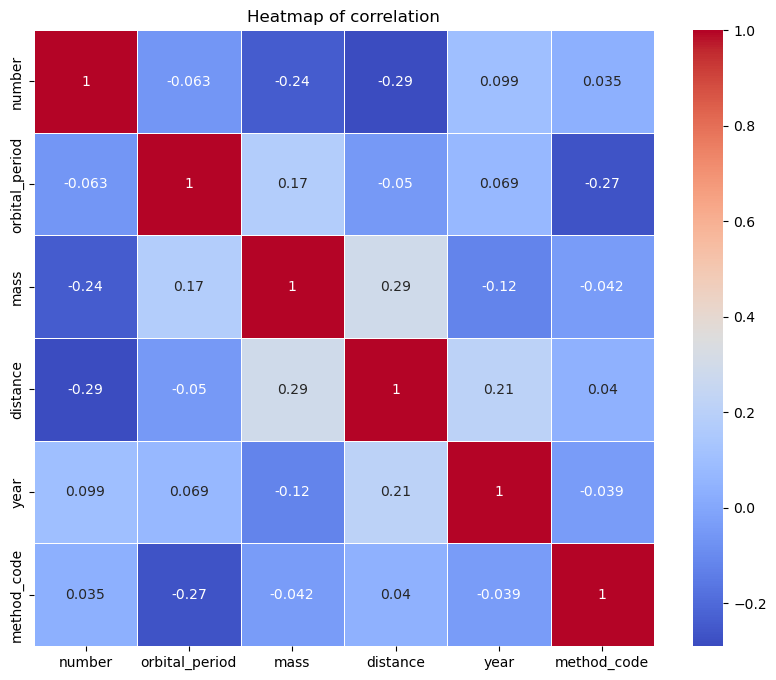

In [152]:
corr_matrix = planets_dataset.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of correlation')
plt.show()

<h4>Отже, тепер ми маємо датасет з даними і без пропусків, і можемо розбити його на навчальні/валідаційні/тестові дані в пропорціях 70/15/15</h4>

In [153]:
X = planets_dataset.drop(columns=['mass'])
y = planets_dataset['mass']

In [154]:
X_train, X_template, y_train, y_template = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_template, y_template, test_size=0.5, shuffle=False)
X_train.shape, X_val.shape, X_test.shape

((359, 5), (77, 5), (77, 5))

<h4>1.d, 1.e Тепер можемо приступити до нормалізації отриманих датасетів, так аби нормалізувати дані потрібно обрахувати значення mean(середнього) по кожному з стовпців, та значення std(стандартного відхилення) для кожного зі значень за формулою: 

$$
X_n = \frac{x_i - mean}{std}
$$

$x_n$ - нормалізоване значення ознак колонки

$x_i$ - поточне значення 

$mean$ - середнє значення для даної ознаки

$std$ - стандартне відхилення
</h4>

<h4>Відповідно оскільки в датасеті наявні категорійні дані отримані через label encoding, то варто застосовувати нормалізацію лише до ознак, які будуть безпосередньо використовуватися при навчанні моделі, для цього аби не рахувати нормалізовані дані вручну, застосує вже реалізовану функцію StandartScaler() та відповідно на основі значень mean, std для навчальних даних нормалізуємо валідаційні та тестові, за умовою завдання</h4>

In [155]:
std_x = StandardScaler()
std_y = StandardScaler()

std_x.fit(X_train[['orbital_period', 'distance']])
std_y.fit(y_train.values.reshape(-1, 1))

X_train[['orbital_period', 'distance']] = std_x.transform(X_train[['orbital_period', 'distance']])
y_train = std_y.transform(y_train.values.reshape(-1, 1))

X_val[['orbital_period', 'distance']] = std_x.transform(X_val[['orbital_period', 'distance']])
y_val = std_y.transform(y_val.values.reshape(-1, 1))

X_test[['orbital_period', 'distance']] = std_x.transform(X_test[['orbital_period', 'distance']])
y_test = std_y.transform(y_test.values.reshape(-1, 1))

In [156]:
X_train.head(4)

,number,orbital_period,distance,year,method_code
0,1,-0.382762,0.650992,2006,7
1,1,0.050293,0.178555,2008,7
2,1,-0.029651,-0.678764,2011,7
3,1,-0.342186,1.418444,2007,7


In [157]:
X_val.head(4)

,number,orbital_period,distance,year,method_code
479,1,0.803595,-0.308437,2005,7
480,1,0.353714,1.320491,2011,7
481,1,-0.299079,-0.338470,2003,7
482,1,0.180627,0.234000,2008,7


In [158]:
X_test.head(4)

,number,orbital_period,distance,year,method_code
563,1,2.918538,3.238195,2009,7
564,1,-0.557959,-0.677609,1999,7
565,2,-0.521932,-0.933349,2011,7
566,2,-0.199304,-0.933349,2011,7


<h4>Тепер дані готові до використання для навчання моделі дерева рішень та подальшого їх використання в алгоритмі PCA</h4>

---
<h4>Частина 2. Побудова дерева рішень </h4>


<h4>2.a, 2.b Створимо 3 моделі дерев рішень з різними значеннями глубини відповідно до завдання, та запустимо їх навчатися/валідуватися/тестуватися і візуалізуємо отримані результати</h4>

In [159]:
depths = [1, 2, 5]
decision_trees = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=2004)
    model.fit(X_train, y_train)
    decision_trees.append(model)

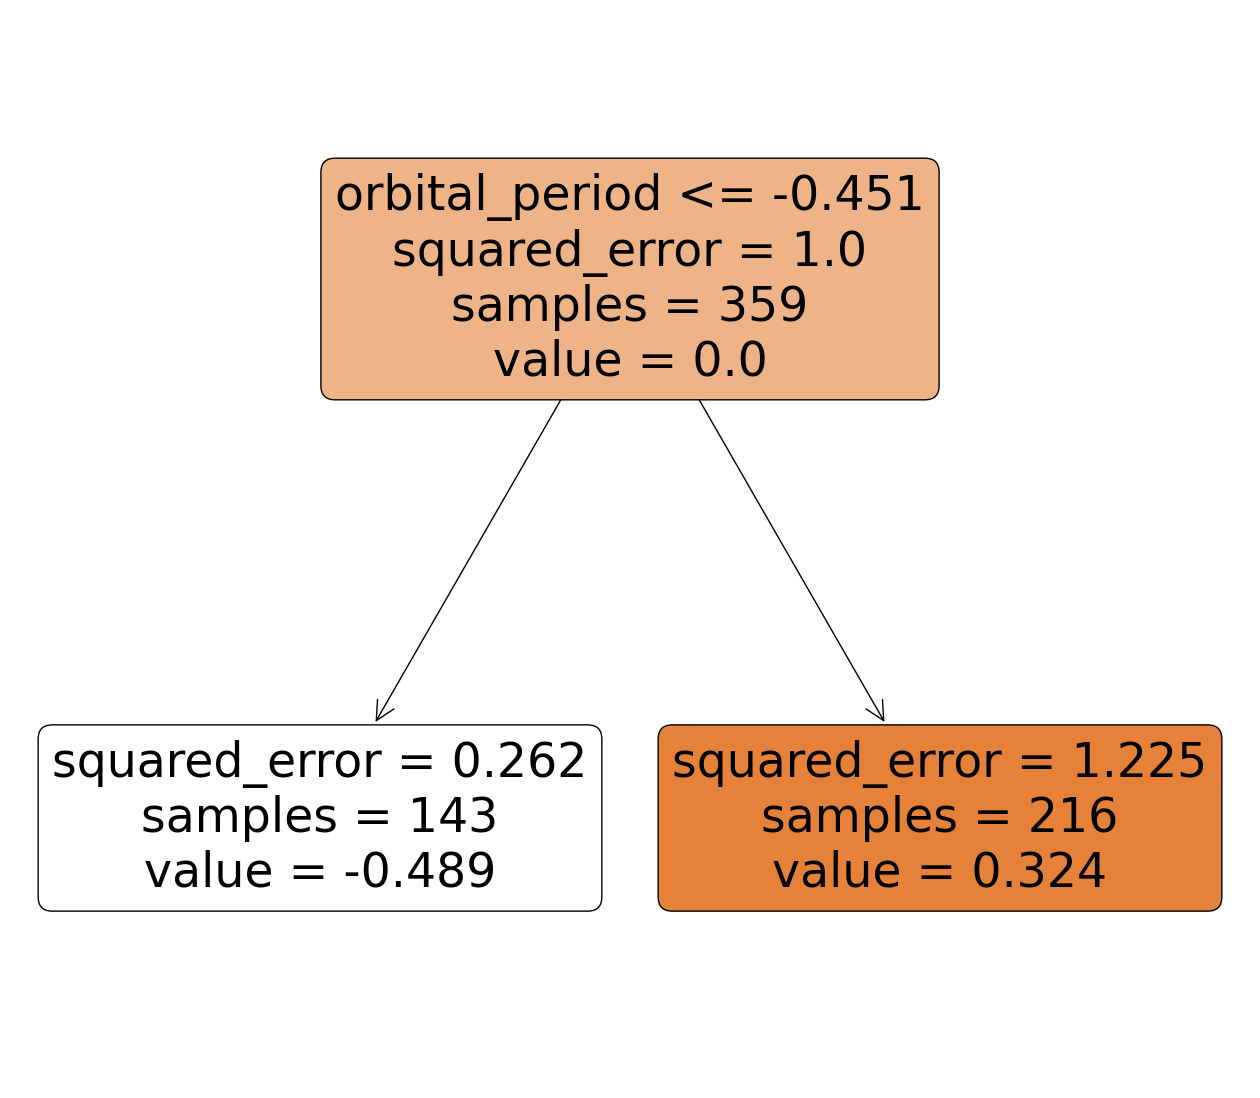

 Depth of decision tree => 1

 MSE on train data => 0.8418
 MAE on train data => 0.5753
 Accuracy on train data => 1.0000

 MSE on validation data => 1.0174
 MAE on validation data => 0.6673
 Accuracy on validation data => 0.3766

 MSE on test data => 0.9229
 MAE on test data => 0.6246
 Accuracy on test data => 0.5844



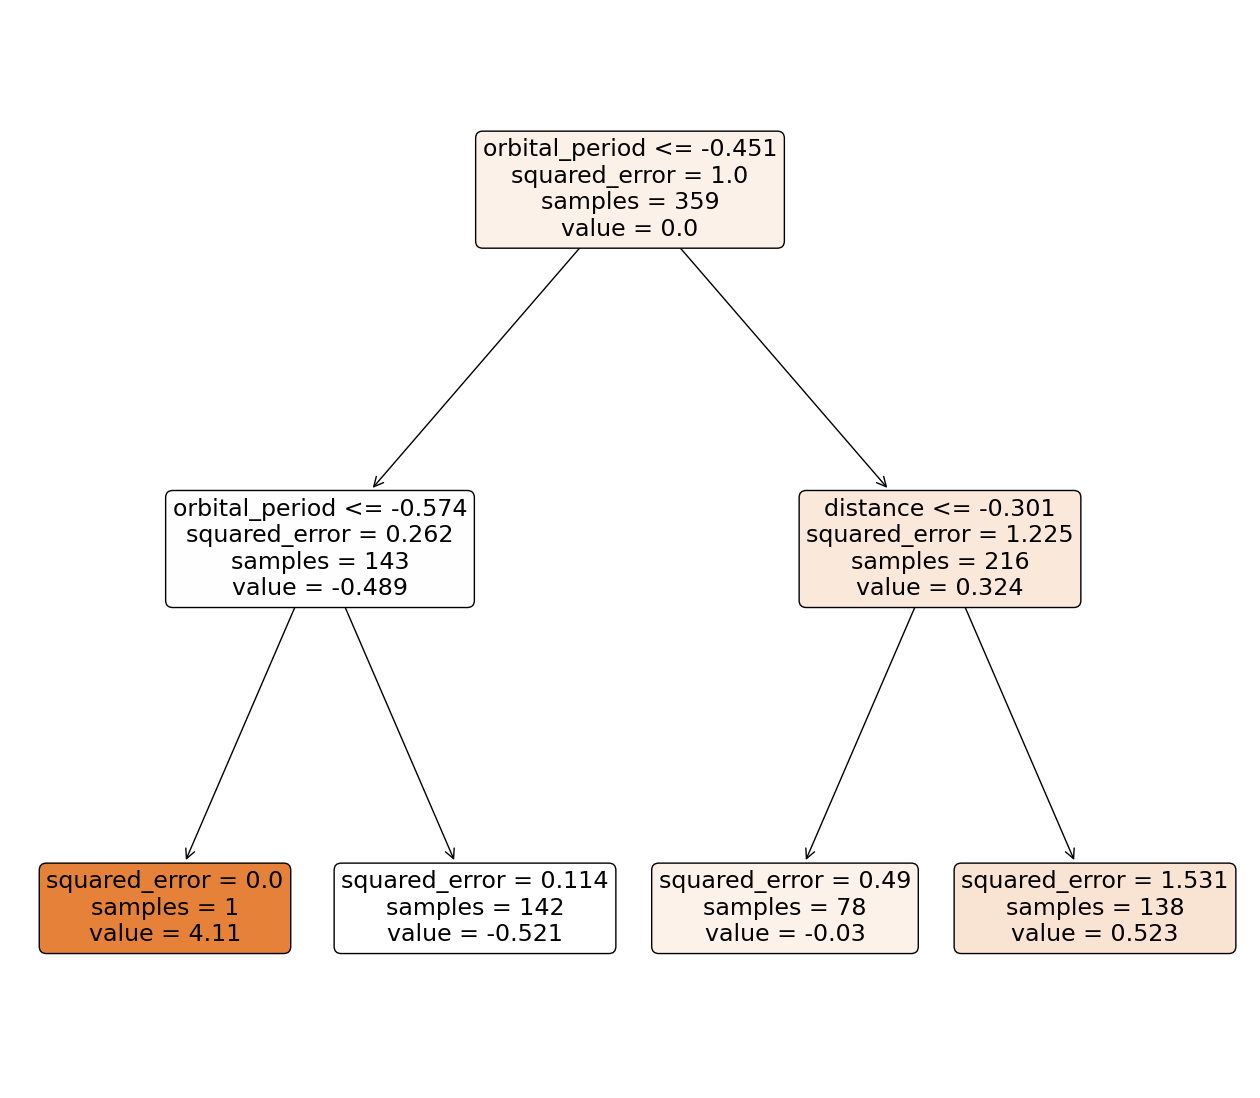

 Depth of decision tree => 2

 MSE on train data => 0.7400
 MAE on train data => 0.5397
 Accuracy on train data => 1.0000

 MSE on validation data => 1.0676
 MAE on validation data => 0.7182
 Accuracy on validation data => 0.4805

 MSE on test data => 0.9081
 MAE on test data => 0.6171
 Accuracy on test data => 0.6883



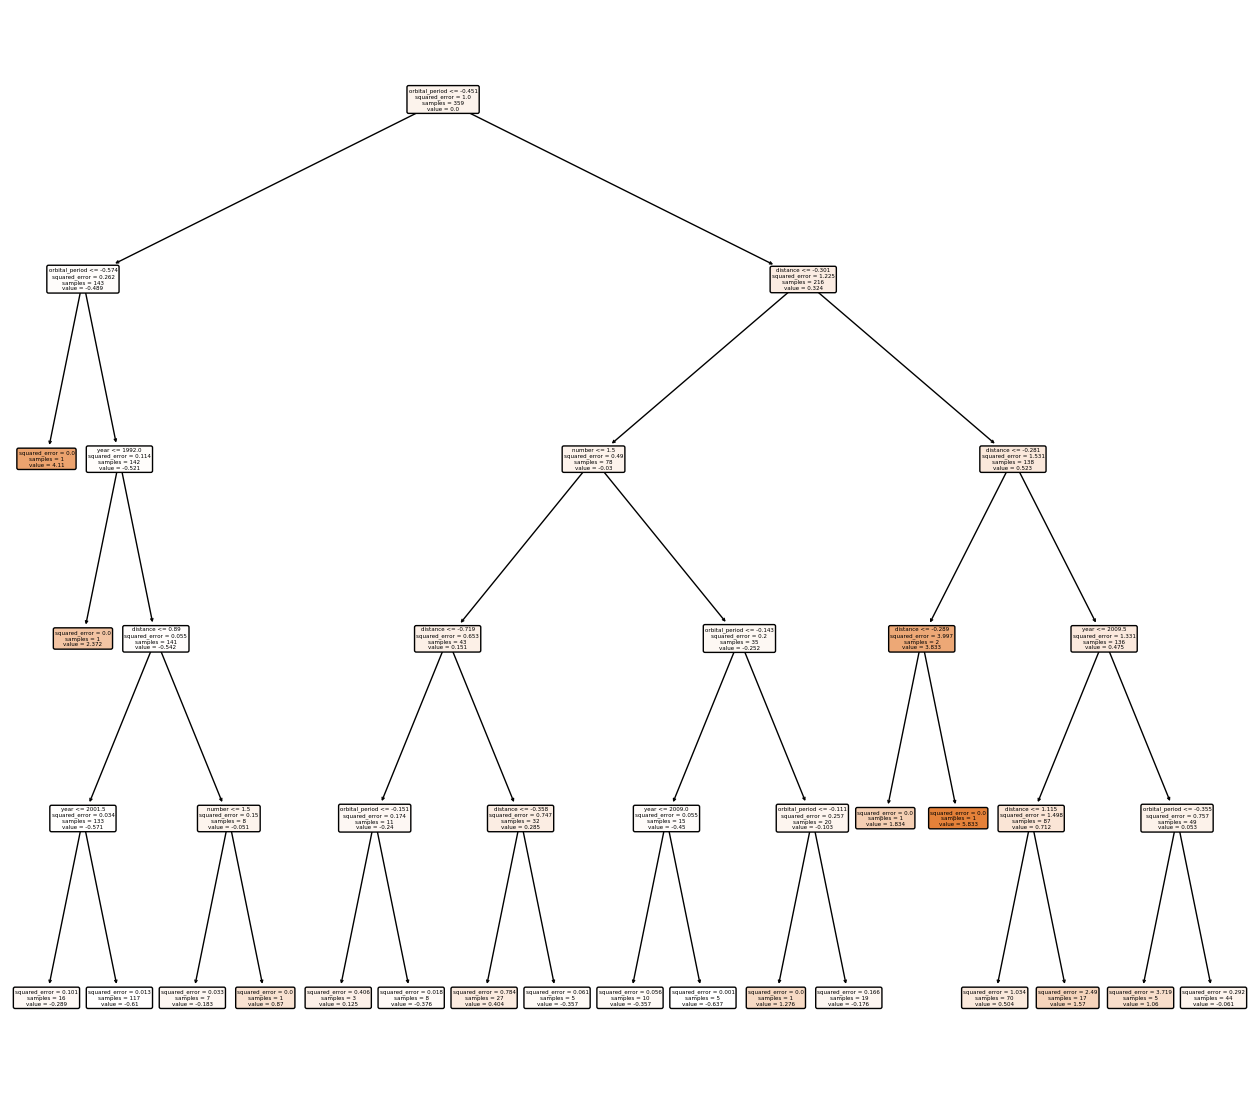

 Depth of decision tree => 5

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 1.2888
 MAE on validation data => 0.7826
 Accuracy on validation data => 0.5065

 MSE on test data => 0.9247
 MAE on test data => 0.6292
 Accuracy on test data => 0.6623



In [160]:
for tree in decision_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True)
    plt.show()
    y_pred_train = tree.predict(X_train) 
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)
    threshold = 0.1 

    y_pred_train_bin = (y_pred_train <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",
          
          
          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n", 
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n") 

<h4>Із отриманих результатів, бачимо що найкращу точність і найменшу похибку на тестових і валідаційних даних дає дерево з глибиною 2, і в свою чергу можемо сказати також, що дерево з глибиною 1 має недовнавчання, а дерево з глибиною 5 навпаки перенавчання і за рахунок цього точність моделі навпаки спадає</h4>

---
<h4>Частина 3. Зашумлення.</h4>

<h4>3.а Додамо до тренувальних даних шум розподілений за рівномірним розподілом в діапазоні [-0.1; 0.1]</h4>

In [161]:
X_train

,number,orbital_period,distance,year,method_code
0,1,-0.382762,0.650992,2006,7
1,1,0.050293,0.178555,2008,7
2,1,-0.029651,-0.678764,2011,7
3,1,-0.342186,1.418444,2007,7
4,1,-0.206156,1.622897,2009,7
...,...,...,...,...,...
474,3,-0.555646,-0.800743,2011,7
475,3,-0.499044,-0.800743,2011,7
476,1,-0.339347,-0.248834,2011,7
477,1,0.229764,1.666560,2008,7


In [162]:
X_noise = np.random.uniform(low=-0.1, high=0.1, size=X_train.shape)
X_train_noise = X_train + X_noise
X_train_noise

,number,orbital_period,distance,year,method_code
0,0.901329,-0.459870,0.749422,2005.965144,6.999832
1,1.046510,-0.028740,0.137965,2007.958819,7.078113
2,1.009216,-0.014563,-0.618220,2011.025645,7.008409
3,1.054972,-0.385761,1.364194,2007.088147,7.076424
4,1.012847,-0.258629,1.702572,2008.910507,7.080434
...,...,...,...,...,...
474,3.062748,-0.633276,-0.713800,2011.096004,6.962166
475,2.968108,-0.456910,-0.725912,2011.059980,6.992813
476,0.913532,-0.326936,-0.171687,2010.957410,6.914502
477,1.042924,0.135373,1.706299,2007.929185,7.031030


<h4>3.b, 3.c Для отриманих зашумлених тренувальних даних, створимо 3 дерева рішення відпвідно до завдання та візуалізуємо їх та їхні результати</h4>

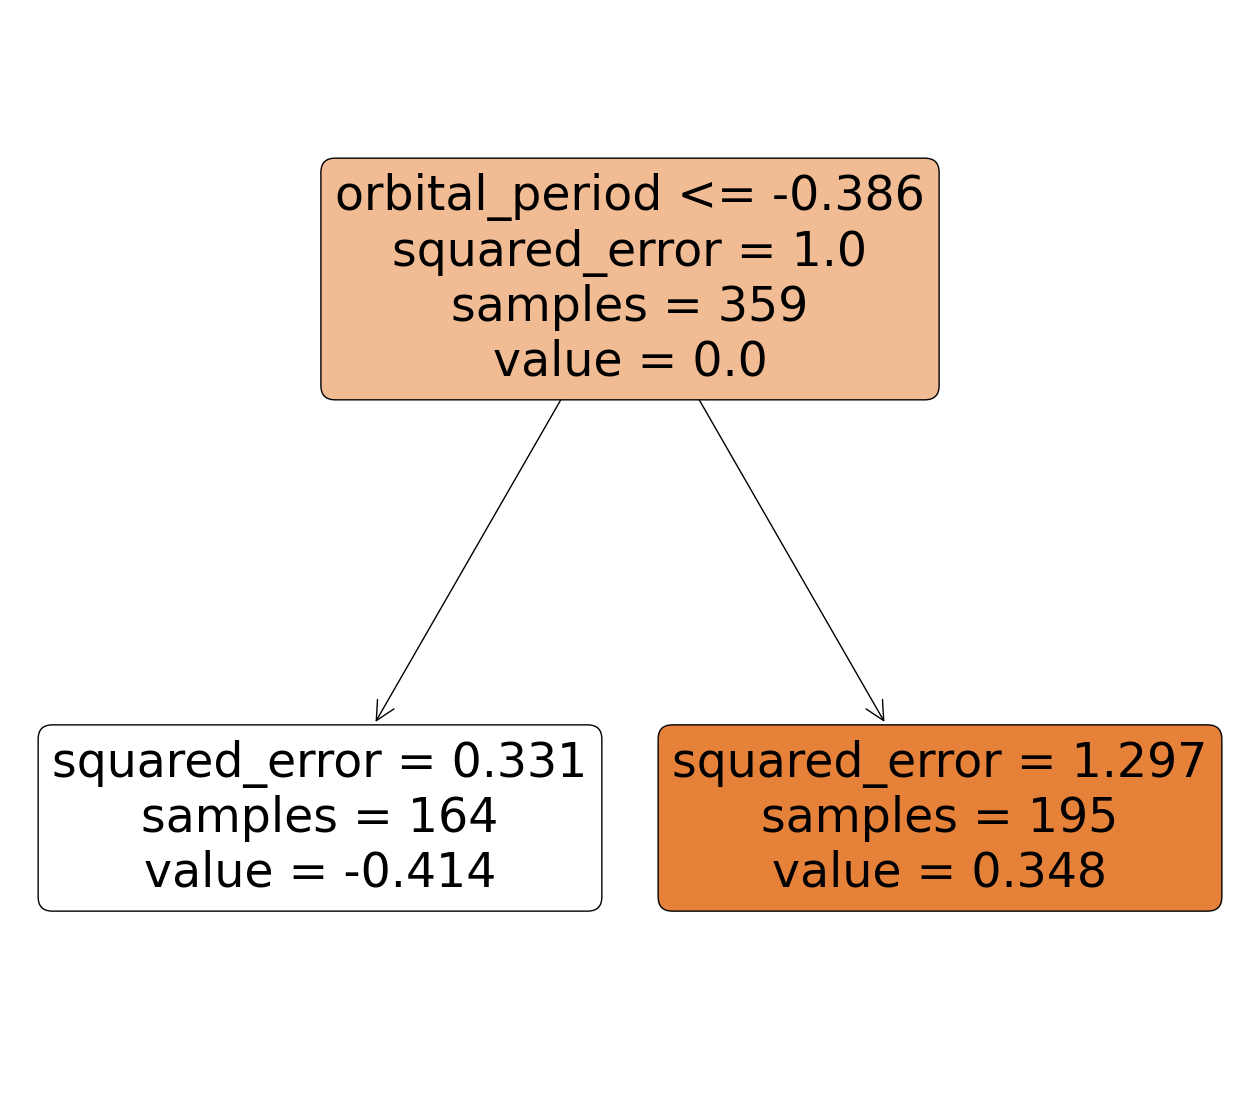

 Depth of decision tree => 1

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9949
 MAE on validation data => 0.6713
 Accuracy on validation data => 0.4286

 MSE on test data => 0.9916
 MAE on test data => 0.6366
 Accuracy on test data => 0.5844



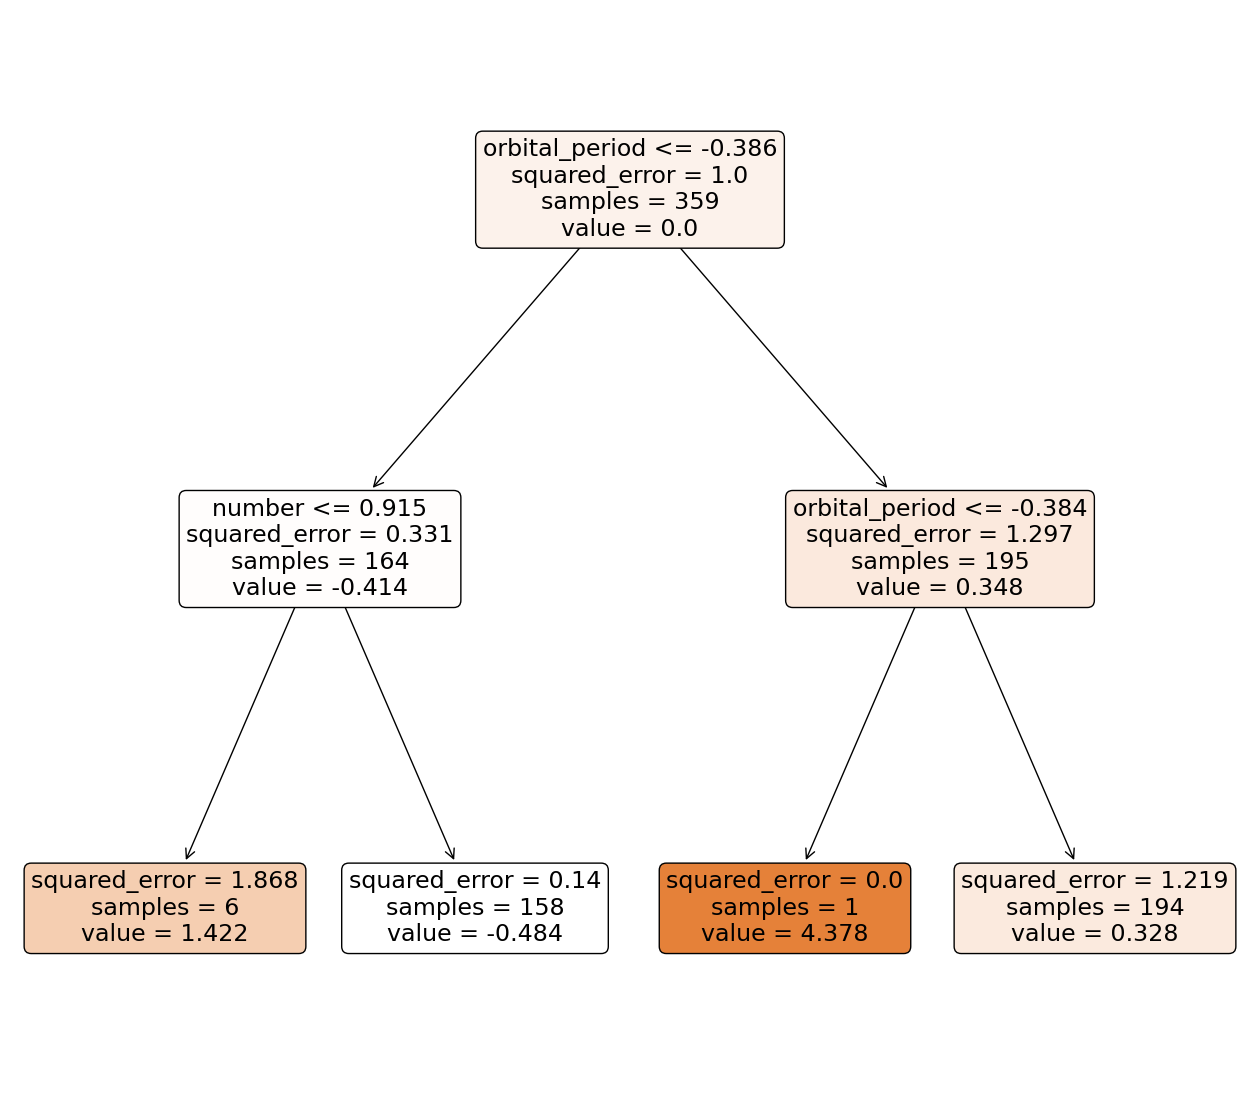

 Depth of decision tree => 2

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 1.0147
 MAE on validation data => 0.6659
 Accuracy on validation data => 0.4286

 MSE on test data => 1.0058
 MAE on test data => 0.6256
 Accuracy on test data => 0.5844



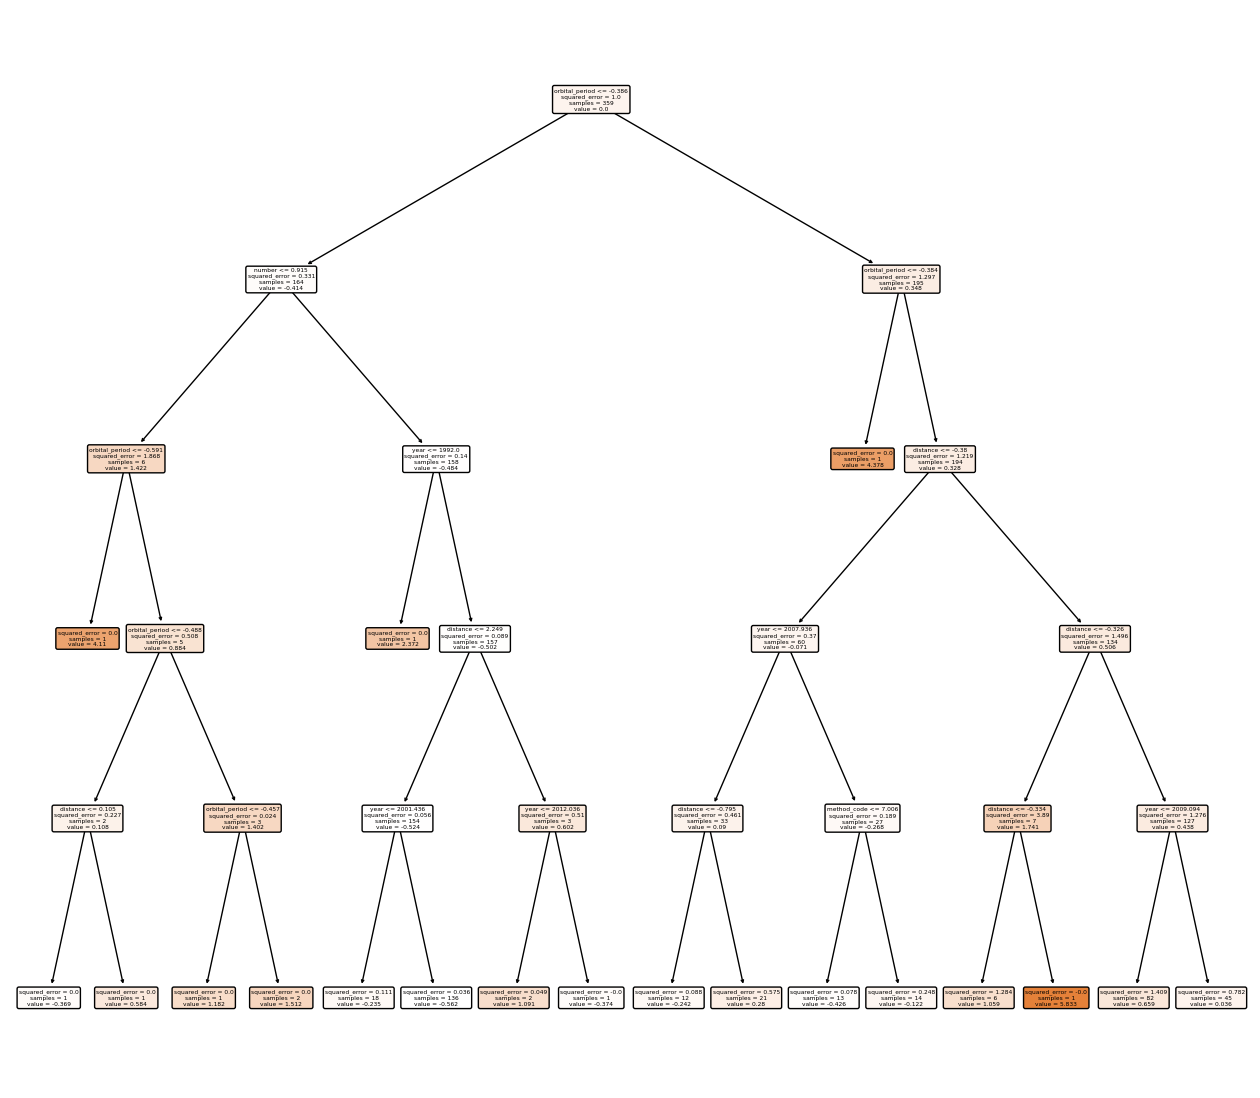

 Depth of decision tree => 5

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 1.0639
 MAE on validation data => 0.6993
 Accuracy on validation data => 0.5584

 MSE on test data => 1.1693
 MAE on test data => 0.6771
 Accuracy on test data => 0.6234



In [163]:
noise_trees = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=2004)
    model.fit(X_train_noise, y_train)
    noise_trees.append(model)


for tree in noise_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True)
    plt.show()
    y_pred_train_noise = tree.predict(X_train_noise) 
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)

    threshold = 0.1

    y_pred_train_bin = (y_pred_train_noise <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)

    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",
          
          
          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n", 
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n") 

<h4>Із отриманих результатів бачимо, що шум негативно вплинув на модель навчання, оскільки точність прогнозування навіть на найбільш збалансованій моделі з глубиною 2 просіла і погіршилася.</h4>

---
<h4>Частина 4. Знешумлення</h4> 

<h4>Для тренувальних даних, та зашумлених даних порахуємо алгоритм PCA, та відповідно провидемо візуалізацію отриманих результатів, відповідно реазілуємо для зручності візуалізації даний алгоритм лише на 2ох компонентах датасетів</h4>

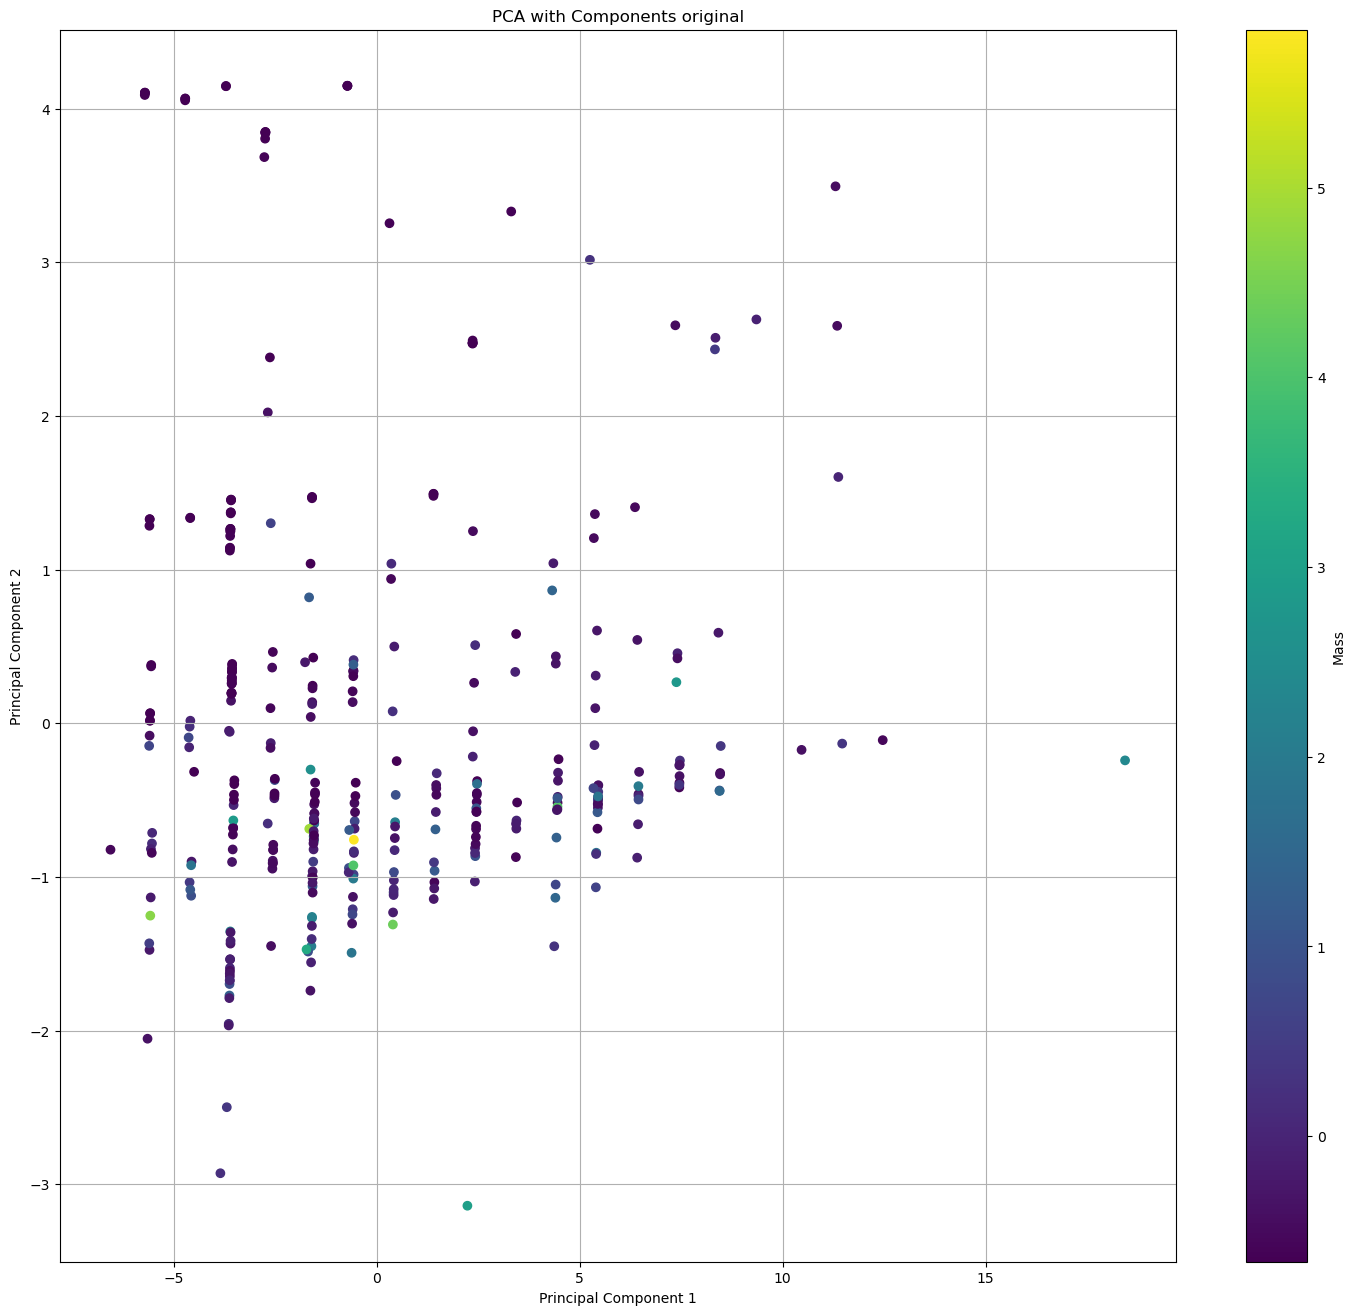

In [164]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(18, 16))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title(f'PCA with Components original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Mass')
plt.grid(True)
plt.show() 


In [165]:
pca.explained_variance_ratio_

array([0.82216207, 0.0872187 ])

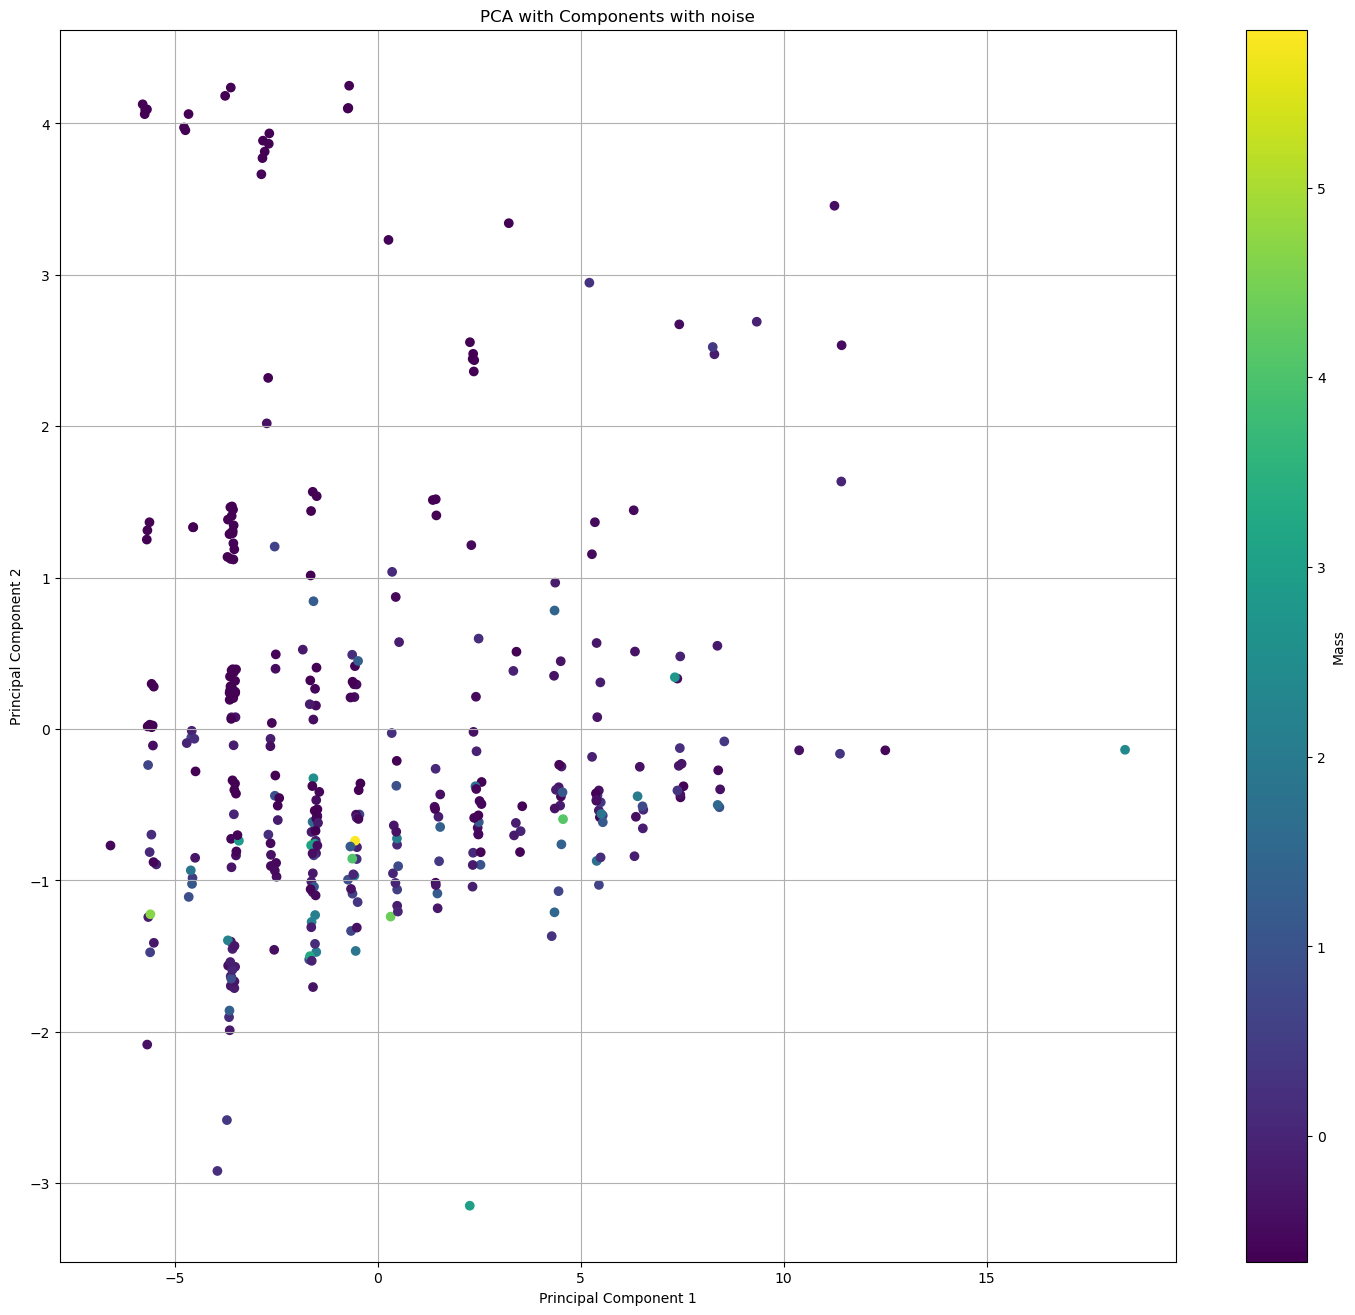

In [166]:
pca_noise = PCA(n_components=2)
X_train_noise_pca = pca_noise.fit_transform(X_train_noise)

plt.figure(figsize=(18, 16))
plt.scatter(X_train_noise_pca[:, 0], X_train_noise_pca[:, 1], c=y_train, cmap='viridis')
plt.title(f'PCA with Components with noise')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Mass')
plt.grid(True)
plt.show() 

In [167]:
pca_noise.explained_variance_ratio_

array([0.8219266 , 0.08716155])

<h4>Із отриманих результатів можемо сказати, що більшу частку дисперсії пояснює компонента з variance 0.82 для обох датасетів, і відповідно ознака для якої застосований даний variance містить більше корисної інформації ніж інша навіть на зменшиних через PCA алгоритм даних</h4>

<h4>Тепер спробуємо реконстроювати початкові тренувальні дані, за рахунок знешумлення зашумлених даних, також використовуючи алгоритм PCA, використовуючи ознаки, що пояснюють 95% variance між усіма компонентами, та відповідно візуалізувати отримані результати в порівнянні по кожній з ознак</h4>

In [168]:
pca_95 = PCA(0.95)
X_train_95 = pca_95.fit_transform(X_train_noise)
X_train_denoised = pca_95.inverse_transform(X_train_95)


In [169]:
df_original_data = pd.DataFrame(X_train, columns=X_train.columns)
df_noise_data =  pd.DataFrame(X_train_noise, columns=X_train.columns)
df_denoised_data = pd.DataFrame(X_train_denoised, columns=X_train.columns)
df = pd.concat([df_original_data, df_noise_data, df_denoised_data], axis=1)
df_original_data.iloc[[0]]

,number,orbital_period,distance,year,method_code
0,1,-0.382762,0.650992,2006,7


In [170]:
df_noise_data.iloc[[0]]

,number,orbital_period,distance,year,method_code
0,0.901329,-0.45987,0.749422,2005.965144,6.999832


In [171]:
df_denoised_data.iloc[[0]]

,number,orbital_period,distance,year,method_code
0,0.832767,-0.500739,0.616393,2005.974134,7.061733


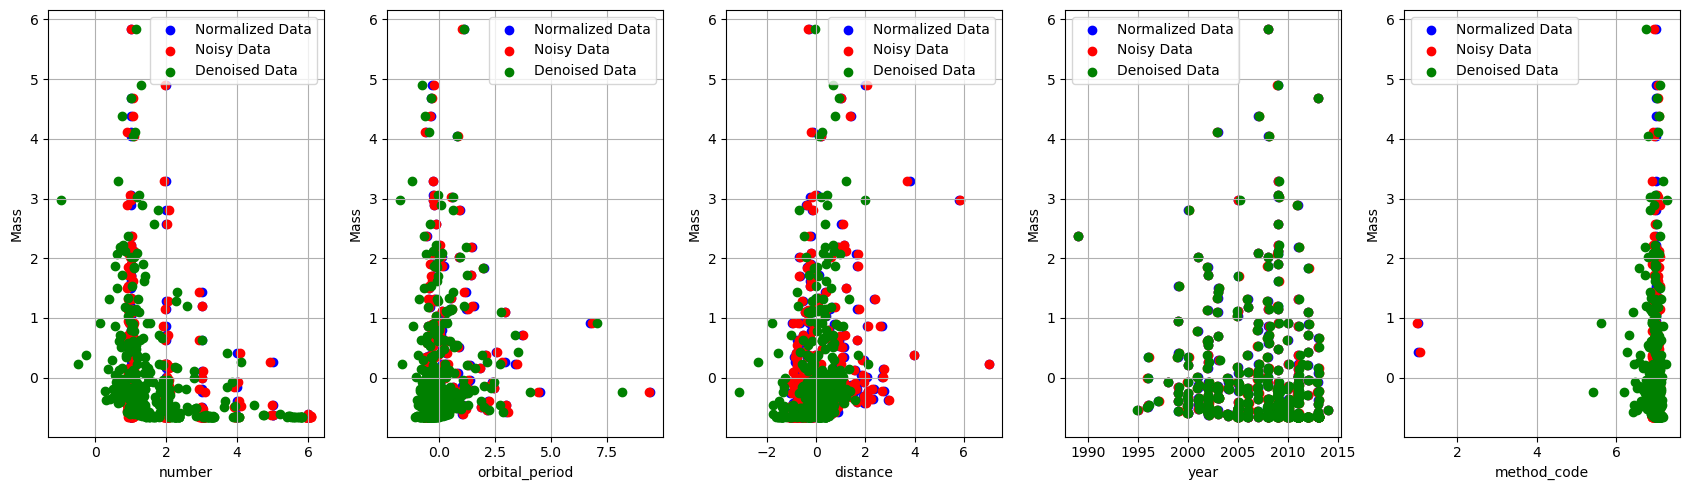

In [172]:
X_train_denoised_df = pd.DataFrame(X_train_denoised, columns=X_train.columns)

fig, axes = plt.subplots(nrows=1, ncols=len(X_train.columns), figsize=(17, 5))
feature_names = list(X_train.columns)
for j, ax in enumerate(axes):
    ax.scatter(X_train.iloc[:, j], y_train, c='blue', label='Normalized Data')
    ax.scatter(X_train_noise.iloc[:, j], y_train, c='red', label='Noisy Data')
    ax.scatter(X_train_denoised_df.iloc[:, j], y_train, c='green', label='Denoised Data')
    
    ax.set_xlabel(f'{feature_names[j]}')
    ax.set_ylabel('Mass')
    ax.legend()
    ax.grid(True)
   
plt.tight_layout()
plt.show()


<h4>Як можемо побачити із візуалізації по кожній з ознак, знешумлені дані наблизилися доволі близько до оригінальних даних, що свідчить про те, що алогритм PCA окрім зменшення розмірності даних із збереженням ключових ознак, та позбавлення кореляції між даними також справляється і з задачою знешумлення даних за рахунок того, що він відкидає найменш важливі компоненти із зменшиних даних, які відповідно представляють собою шум, оскільки в матриці коваріації вони мають найменші значення коваріації</h4>

---
<h4>Частина 5.</h4>

<h4>На основі знешумлених та зашумлених даних побудуємо дерева рішень, та порівняємо їхню точність прогнозування на основі валідаційних та тестових даних</h4>

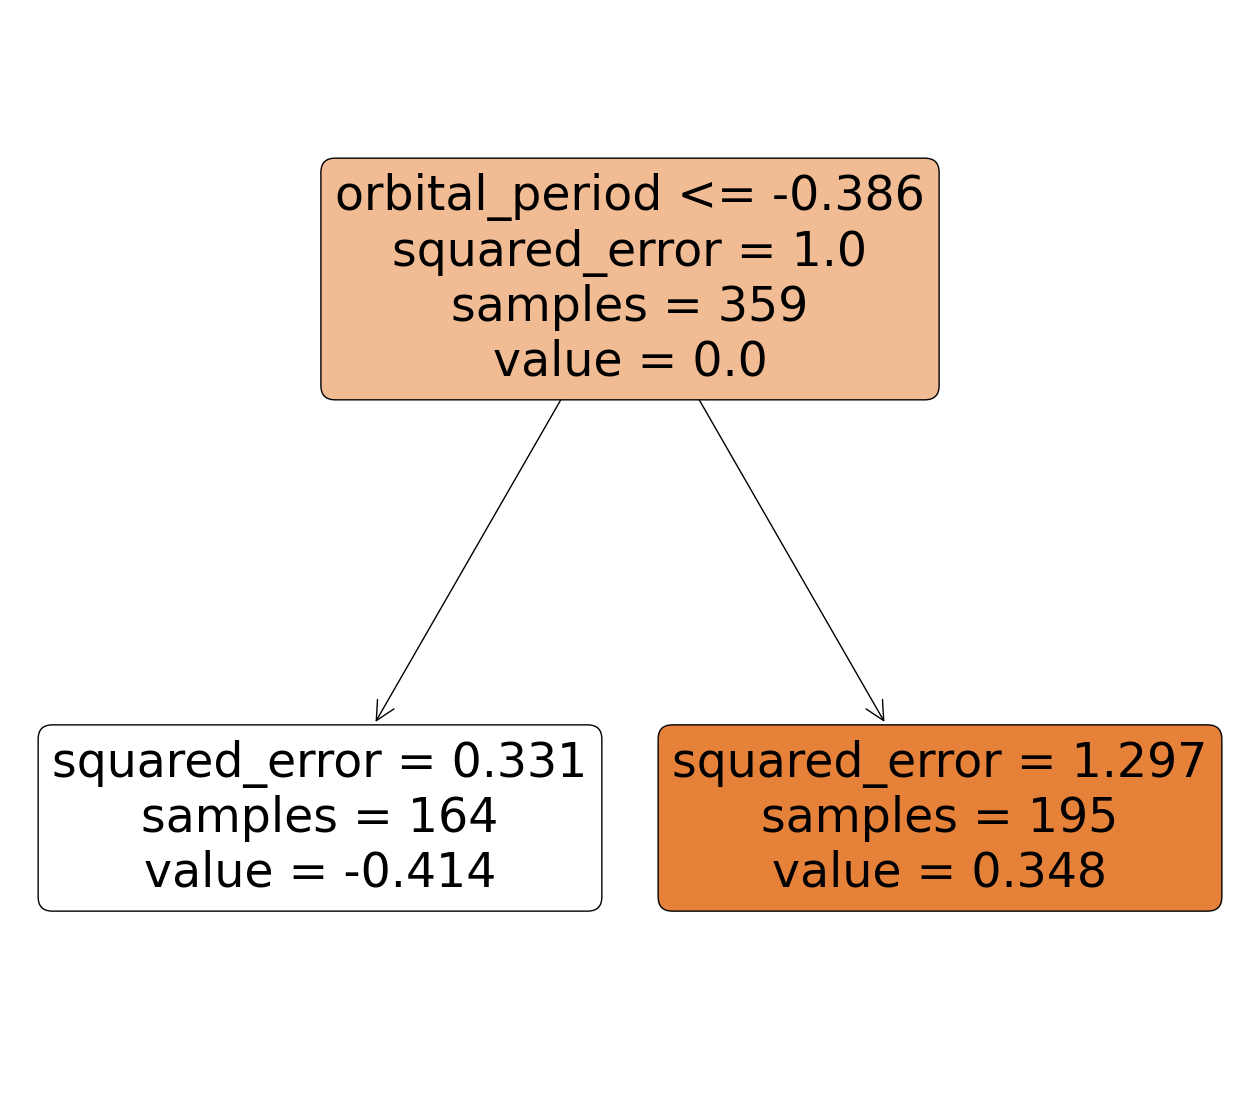

 Depth of decision tree => 1

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9949
 MAE on validation data => 0.6713
 Accuracy on validation data => 0.4286

 MSE on test data => 0.9916
 MAE on test data => 0.6366
 Accuracy on test data => 0.5844



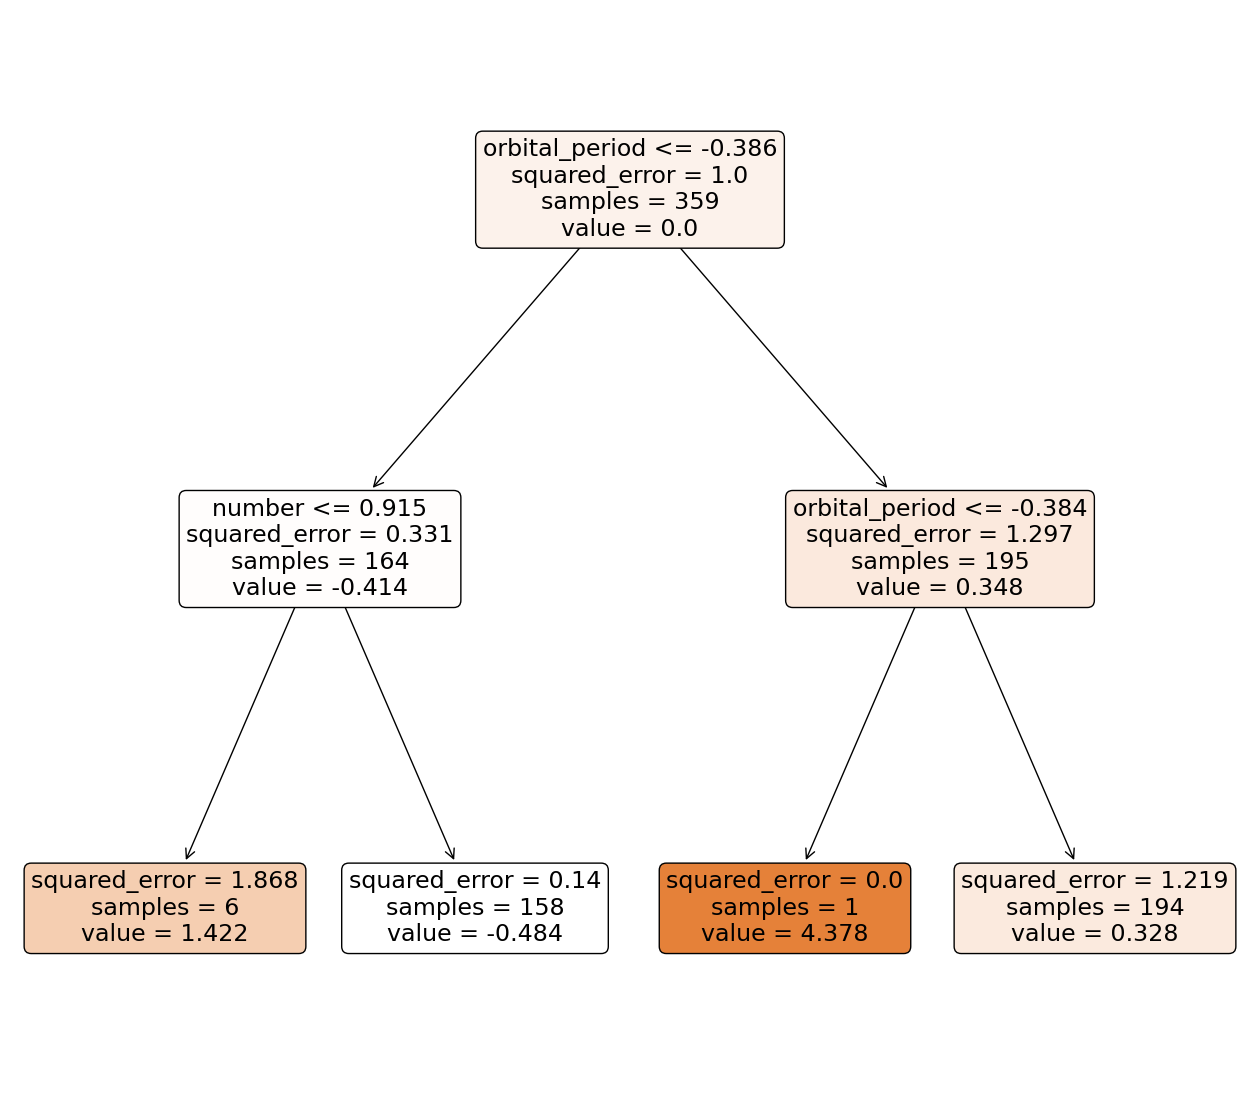

 Depth of decision tree => 2

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 1.0147
 MAE on validation data => 0.6659
 Accuracy on validation data => 0.4286

 MSE on test data => 1.0058
 MAE on test data => 0.6256
 Accuracy on test data => 0.5844



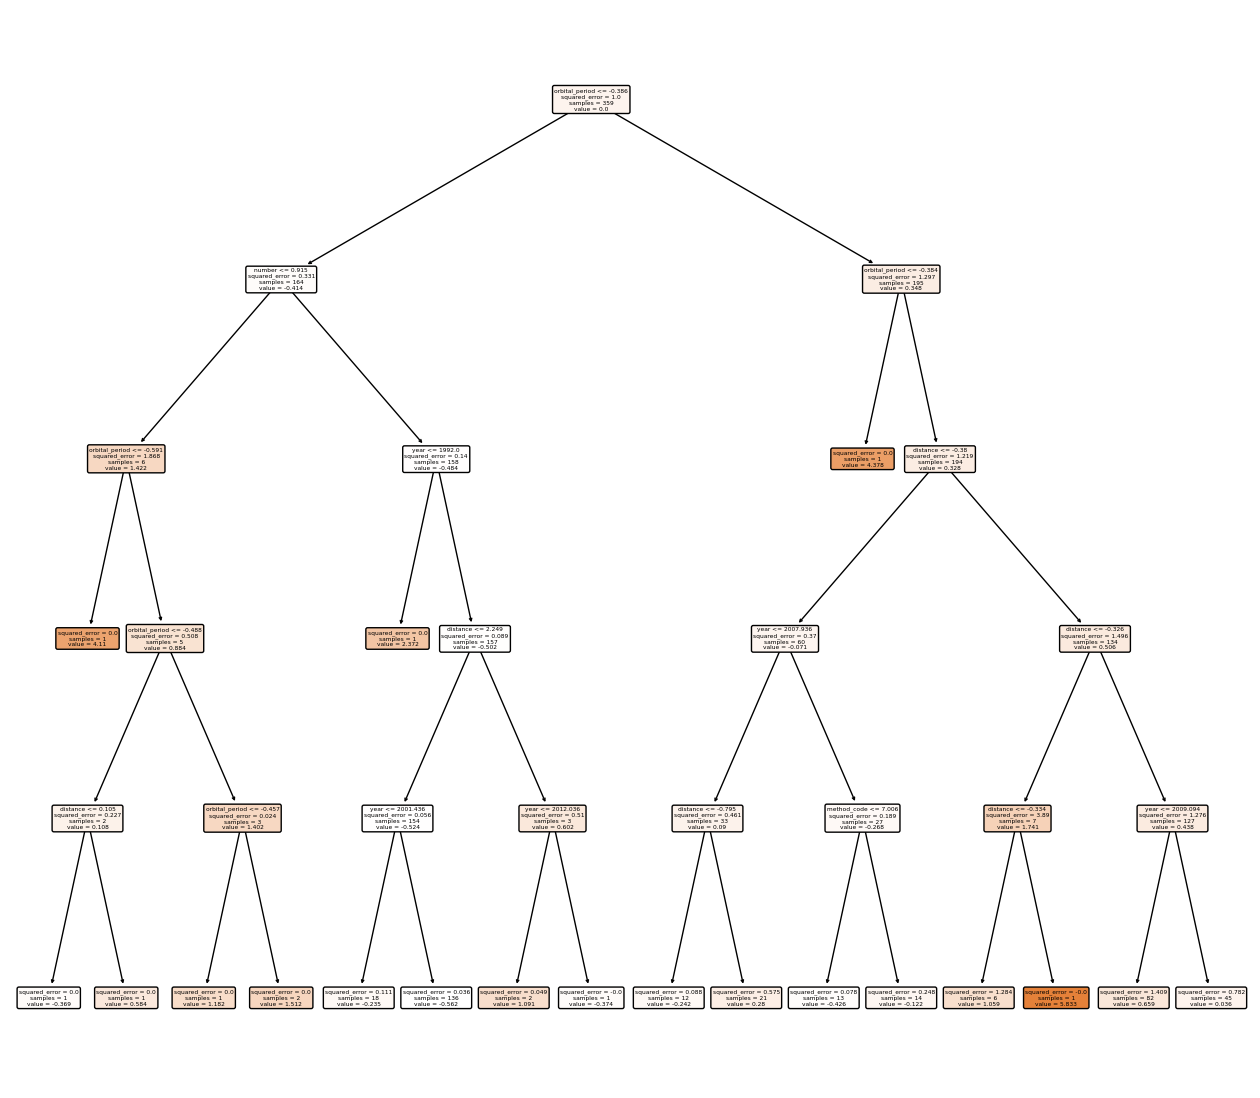

 Depth of decision tree => 5

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 1.0639
 MAE on validation data => 0.6993
 Accuracy on validation data => 0.5584

 MSE on test data => 1.1693
 MAE on test data => 0.6771
 Accuracy on test data => 0.6234



In [173]:
noise_trees_second = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=2004)
    model.fit(X_train_noise, y_train)
    noise_trees_second.append(model)

for tree in noise_trees_second:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True)
    plt.show()
    y_pred_train_noise = tree.predict(X_train_noise) 
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)

    threshold = 0.1

    y_pred_train_bin = (y_pred_train_noise <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)

    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",
          
          
          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n", 
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n") 

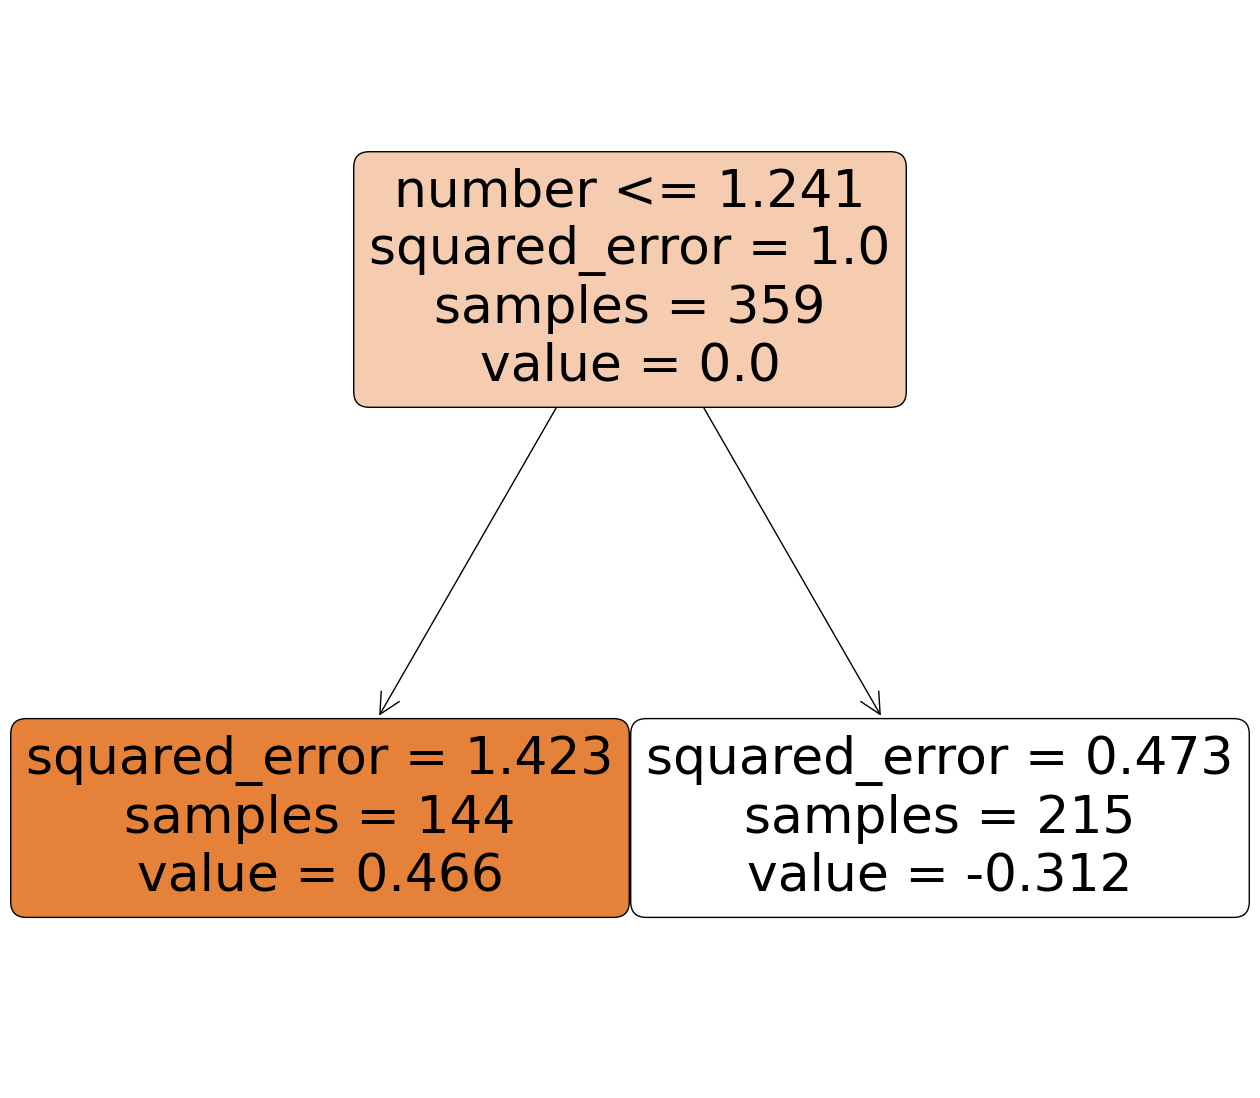

 Depth of decision tree => 1

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9564
 MAE on validation data => 0.7158
 Accuracy on validation data => 0.4675

 MSE on test data => 1.0389
 MAE on test data => 0.7477
 Accuracy on test data => 0.5195



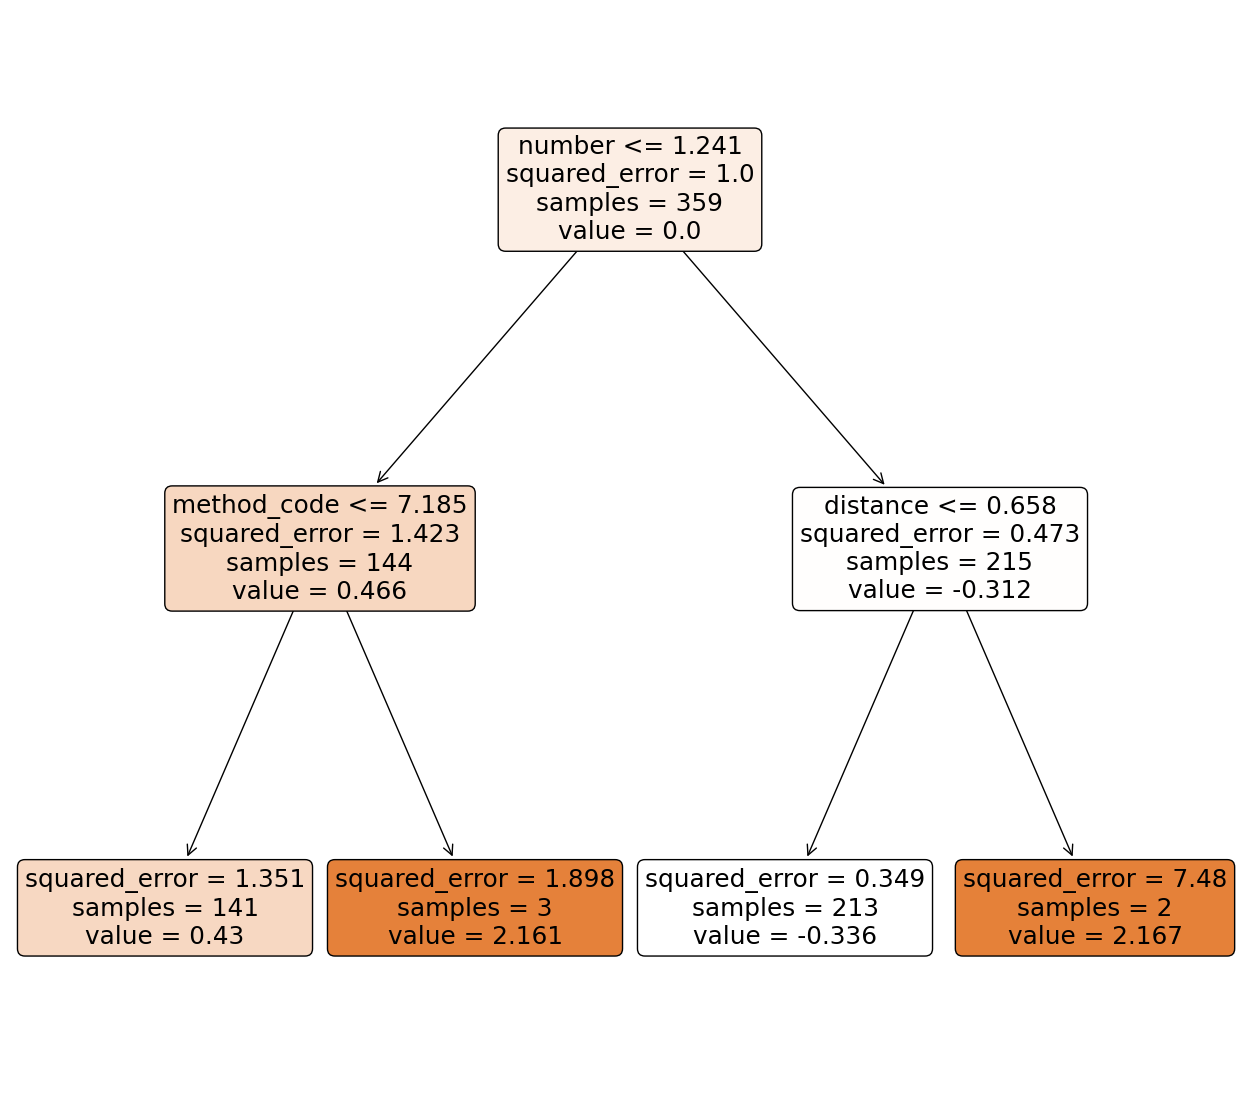

 Depth of decision tree => 2

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9453
 MAE on validation data => 0.7041
 Accuracy on validation data => 0.4675

 MSE on test data => 1.1880
 MAE on test data => 0.7894
 Accuracy on test data => 0.5065



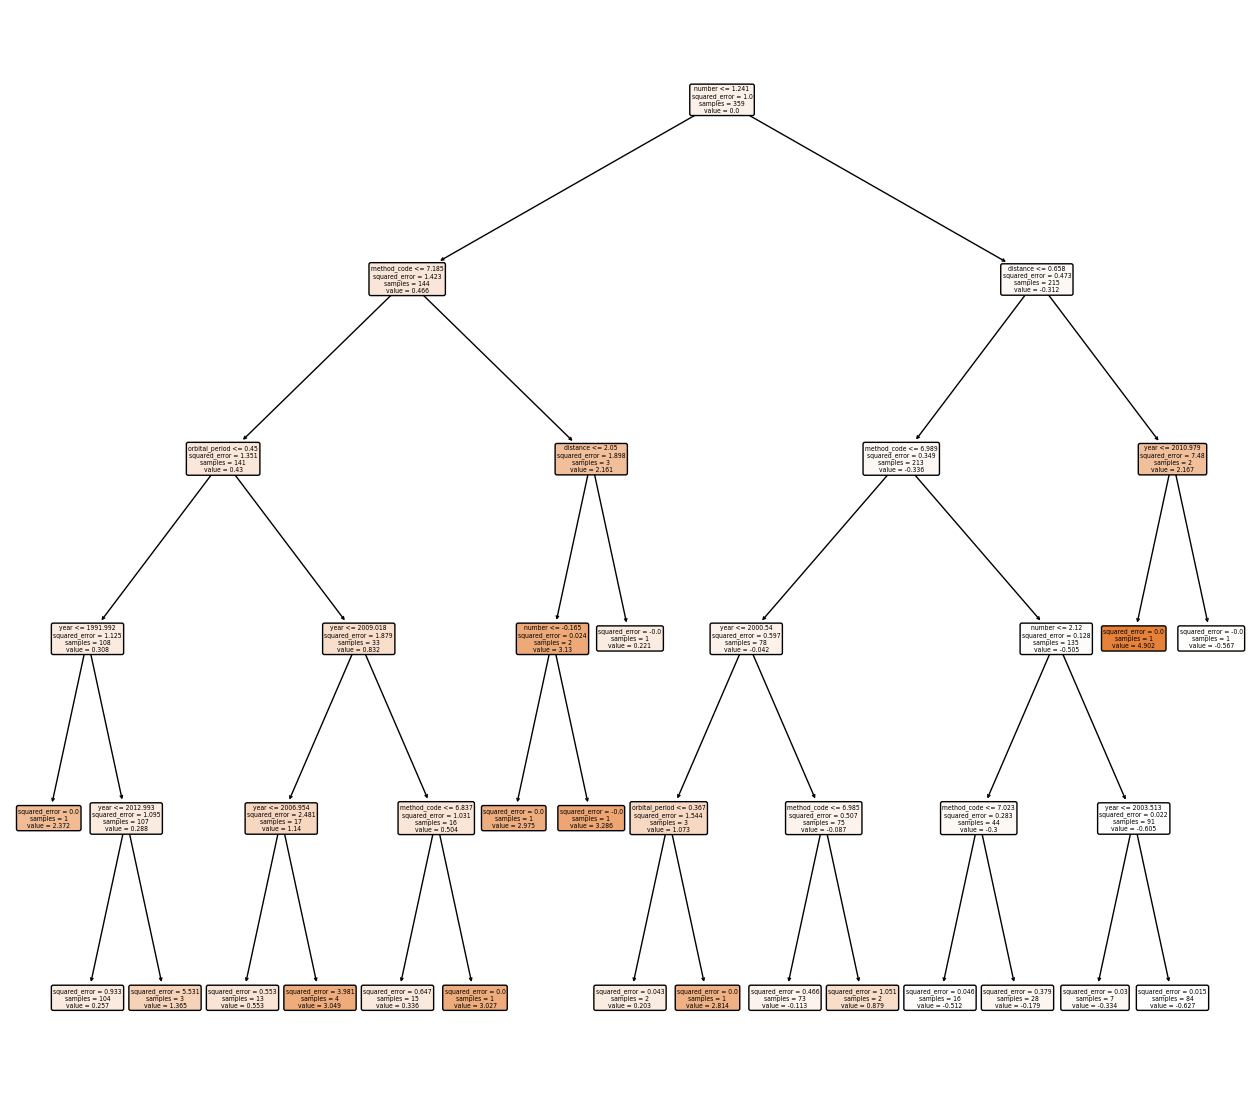

 Depth of decision tree => 5

 MSE on train data => 0.4904
 MAE on train data => 0.4129
 Accuracy on train data => 1.0000

 MSE on validation data => 1.2799
 MAE on validation data => 0.7736
 Accuracy on validation data => 0.4675

 MSE on test data => 1.9608
 MAE on test data => 0.9368
 Accuracy on test data => 0.5195



In [174]:
denoise_trees = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=2004)
    model.fit(X_train_denoised_df, y_train)
    denoise_trees.append(model)

for tree in denoise_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True)
    plt.show()
    y_pred_train_denoised = tree.predict(X_train_denoised_df) 
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)

    threshold = 0.1

    y_pred_train_bin = (y_pred_train_denoised <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

        f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
        f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
        f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

        f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
        f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
        f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",
        
        f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n", 
        f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
        f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n") 

<h4>Із отриманих результатів можемо зробити висновок, що при використанні алгоритму PCA і відповідно зменшенні розмірності і шуму в даних, результати навчання моделі погіршилися на валідаційних і тестових даних для всіх моделей з різною глибиною і особливо сильно це замітно на моделі з глибиною 5,це сталося за рахунок двох основних причин, перш за все тому, що даних через застосування алгоритму стало в рази менше для навчання, через що модель недонавчилася і втратила в точності прогнозування, другою причиною є недостаня кількість компонентів, що призводить до втрати важливої інформації оскільки беруться лише найбільш важливі компоненти, а всі інші відсікаються</h4>

---

<div align="center">
<h2>Висновок
</h2>
</div>
<h4>
У процесі виконання лабораторної роботи я, засвоїв основні відомості про роботу з алгоритмом метод головних компонент(PCA) та дерева рішень, а також навчився працювати з підготовкою і попереднім аналізом та розбиттям вхідних даних на навчальні/валідаційні/тестові, та їх нормалізацію перед навчанням моделі. 

Окрім цього було проаналізовано точність моделі дерева рішень при різній глибині дерева на валідаційних/тестових даних, що дало точність в 68% що насправді мало, але враховуючи малу розмірність датасету цілком прийнятно.

Також було досліджено вплив параметрів шуму на навчальні дані під час навчання моделі, що показало, що шум розподілений за рівномірним розподілом доволі негативно впливає на прогнозування моделі на валідаційних і тестових даних, що свідчить про те, що при наявності реально великих наборів даних, варто використовувати методи позбавлення шуму і виділення основних компонент, що містять найбільше корисної інорфмацї для моделі дерева рішень, такі як алгоритм PCA. При його використанні, трансформовані дані стали меншими в розмірності, оскільки видалилися зайві найменш коваріантні дані та компоненти, та залишилися лише найбільш важливі що містять найбільше інформації, та відповідно за рахунок відкидання зайвих компонент та зменшення розмірності даних зменшилася і точність прогнозування моделі, оскільки хоч і залишилися лише основні ознаки, проте даних для навчання все одно недостатньо. Саме тому важливо застосовувати алгоритм PCA на реально великих масивах даних, де при їх зменшинні і залишенні лише основних ознак точність прогнозування моделі ніяк не постарждає, а можливо і навпаки покращеться за рахунок позбавлення від шуму.</h4>
